<a href="https://colab.research.google.com/github/replayh/DeepLearningWithPython/blob/master/mnist_problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28)


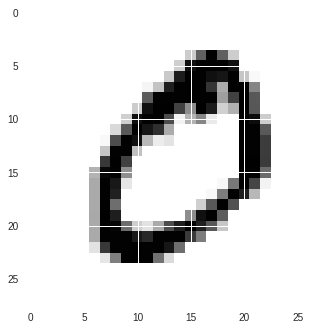

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [0]:
# outlook data

(tr_images, tr_labels), (te_images, te_labels) = mnist.load_data()

print(tr_images.shape)
digit = tr_images[1]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(tr_images[1][0:728])

In [0]:






# Mnist test using Dense Network

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


In [0]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255



In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.2498 - acc: 0.9274
Epoch 2/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.1034 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.0686 - acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.0504 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.0374 - acc: 0.9888


In [0]:
test_lass, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 58us/step
test_acc: 0.9808


In [0]:


# Mnist test using Conv Network


from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [0]:

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_lass, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)



Epoch 1/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0294 - acc: 0.9912
Epoch 2/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.0220 - acc: 0.9934
Epoch 3/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.0169 - acc: 0.9951
Epoch 4/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.0130 - acc: 0.9963
Epoch 5/5
10000/10000 [==============================] - 1s 69us/step
test_acc: 0.9822
